In [1]:
import os
import json

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
def load_json(pth):
    return json.load(open(pth, "r"))

In [3]:
data = load_json("./dataset.json")
train = pd.DataFrame(data)
train.head()

,public_metrics,id,lang,created_at,text,author_id,in_reply_to_user_id,referenced_tweets,withheld,label
0,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",1281829444043382784,en,2020-07-11T05:55:29.000Z,"Waltenburg MA, Victoroff T, Rose CE, et al. Up...",2889108801,None,None,None,real
1,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1298537500152139776,en,2020-08-26T08:27:20.000Z,What to Do When You Clash with Your Kid’s Gran...,824963011546804225,None,None,None,real
2,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1280262797088169984,en,2020-07-06T22:10:11.000Z,JUST IN: \n\nAtlanta Mayor Keisha Lance Bottom...,1275133819939586050,None,None,None,real
3,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1284985315170480129,en,2020-07-19T22:55:47.000Z,Could Bats Hold Clues to COVID Treatments? Don...,56897900,None,None,None,real
4,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",1279402748438593538,en,2020-07-04T13:12:40.000Z,“MMR vaccine could prevent worst symptoms of C...,314706658,None,None,None,real


In [4]:
train["label"].value_counts(normalize=True)

real    0.948068
fake    0.051932
Name: label, dtype: float64

In [5]:
train["label"].value_counts()

real    242587
fake     13288
Name: label, dtype: int64

In [6]:
train.shape

(255875, 10)

In [7]:
train.drop_duplicates(subset=["id"], inplace=True)
train = train[train.lang == "en"]
train.shape

(221439, 10)

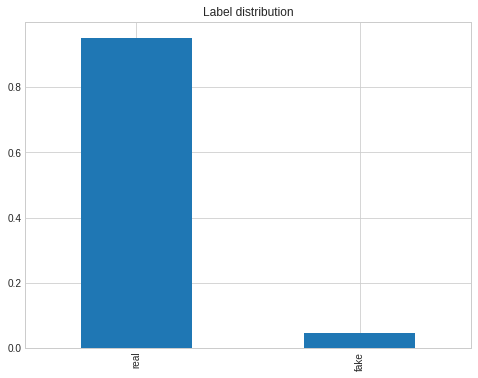

In [8]:
train["label"].value_counts(normalize=True).plot.bar()
plt.title("Label distribution")
plt.show()

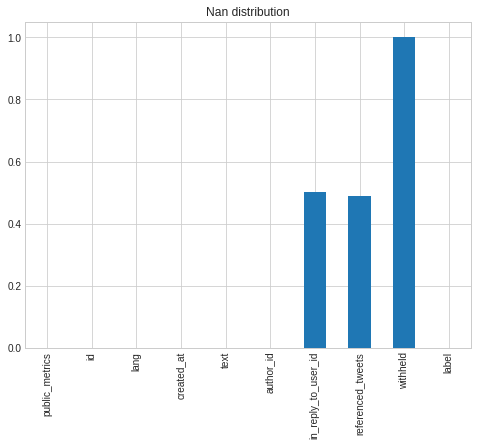

In [9]:
train.isna().mean().plot.bar()
plt.title("Nan distribution")
plt.show()

In [10]:
train.author_id.value_counts().sort_values().tail(10)

125235846              246
92677101               257
826283663658737666     285
93422987               294
3081725823             314
15193667               413
1903413444             419
1247190654956064770    443
1213805916048384000    479
1166260127747280904    485
Name: author_id, dtype: int64

In [11]:
data = train[["text", "author_id", "label", "created_at"]]
public_metrics = pd.DataFrame(list(train["public_metrics"].values))

In [12]:
public_metrics.head()

,retweet_count,reply_count,like_count,quote_count
0,2,0,2,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,1,5,0


In [13]:
for col in public_metrics.columns:
    data[col] = public_metrics[col].values

data.sample(10)

,text,author_id,label,created_at,retweet_count,reply_count,like_count,quote_count
144395,@DaveHCovington Consider yourself lucky. A lot...,134805565,real,2020-03-18T20:35:41.000Z,0,1,0,0
227200,@GrotesqueLogic Hold on... Obama WAITED six mo...,886004179206057985,real,2020-03-10T14:11:14.000Z,0,2,0,0
25854,@GafferAnon She could be at home ort at a frie...,17329083,real,2020-07-01T23:57:48.000Z,0,0,0,0
190775,Can 5G exposure alter the structure and functi...,780120684320153600,fake,2020-04-07T19:50:24.000Z,0,0,0,0
170417,@globaltimesnews Where did the COVID-19 virus ...,1563299498,real,2020-03-17T04:23:58.000Z,0,0,2,0
70242,The important thing isn't the percentage break...,14769495,real,2020-05-30T21:23:48.000Z,0,1,3,0
10636,COVID-19 Planning Considerations: Guidance for...,80042553,real,2020-06-29T01:33:14.000Z,0,0,0,0
39125,Low-Dose Radiation Therapy May Help COVID Pati...,1255675679552581633,real,2020-06-18T17:56:11.000Z,0,0,0,0
125431,&gt;&gt;NEW&lt;&lt; Interim resource document...,1042559236729917440,real,2020-04-15T00:40:54.000Z,5,0,4,2
59074,@NancyMi87040610 @santo_aol @politicususa Stil...,135002272,real,2020-06-30T21:46:54.000Z,0,1,0,0


In [14]:
data["in_reply_to_user_id"] = train["in_reply_to_user_id"].isna().values
data.head()

,text,author_id,label,created_at,retweet_count,reply_count,like_count,quote_count,in_reply_to_user_id
0,"Waltenburg MA, Victoroff T, Rose CE, et al. Up...",2889108801,real,2020-07-11T05:55:29.000Z,2,0,2,0,True
1,What to Do When You Clash with Your Kid’s Gran...,824963011546804225,real,2020-08-26T08:27:20.000Z,0,0,0,0,True
2,JUST IN: \n\nAtlanta Mayor Keisha Lance Bottom...,1275133819939586050,real,2020-07-06T22:10:11.000Z,0,0,0,0,True
3,Could Bats Hold Clues to COVID Treatments? Don...,56897900,real,2020-07-19T22:55:47.000Z,0,0,0,0,True
4,“MMR vaccine could prevent worst symptoms of C...,314706658,real,2020-07-04T13:12:40.000Z,0,1,5,0,True


In [15]:
data.to_json("./data/dataset.json")

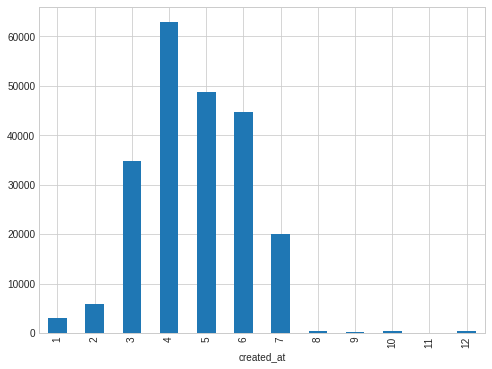

In [16]:
tmp = data.created_at.astype("datetime64")


tmp.groupby(tmp.dt.month).count().plot(kind="bar")
plt.show()

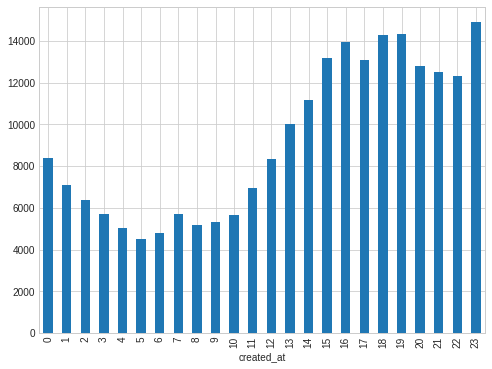

In [17]:
tmp = data.created_at.astype("datetime64")


tmp.groupby(tmp.dt.hour).count().plot(kind="bar")
plt.show()

In [18]:
tmp = data[["created_at"]].astype("datetime64")
tmp["label"] = data.label.values
tmp = tmp.groupby(tmp.created_at.dt.hour)["label"].value_counts(normalize=True)  # .plot(kind="bar")
tmp.head()

created_at  label
0           real     0.944265
            fake     0.055735
1           real     0.935675
            fake     0.064325
2           real     0.926431
Name: label, dtype: float64

In [19]:
# tmp_plot = pd.DataFrame(tmp.values, columns=)

tmp.name = "created_count"
tmp = tmp.reset_index()
tmp.head()


,created_at,label,created_count
0,0,real,0.944265
1,0,fake,0.055735
2,1,real,0.935675
3,1,fake,0.064325
4,2,real,0.926431


In [20]:
tmp.dtypes

created_at         int64
label             object
created_count    float64
dtype: object

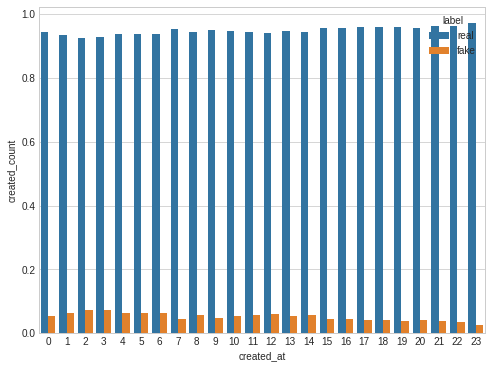

In [22]:
sns.barplot(data=tmp, x="created_at", y="created_count", hue="label",)
plt.show()

In [24]:
import tensorflow as tf

In [26]:
texts = data.text.apply(tf.keras.preprocessing.text.text_to_word_sequence)
texts.head()

0    [waltenburg, ma, victoroff, t, rose, ce, et, a...
1    [what, to, do, when, you, clash, with, your, k...
2    [just, in, atlanta, mayor, keisha, lance, bott...
3    [could, bats, hold, clues, to, covid, treatmen...
4    [“mmr, vaccine, could, prevent, worst, symptom...
Name: text, dtype: object

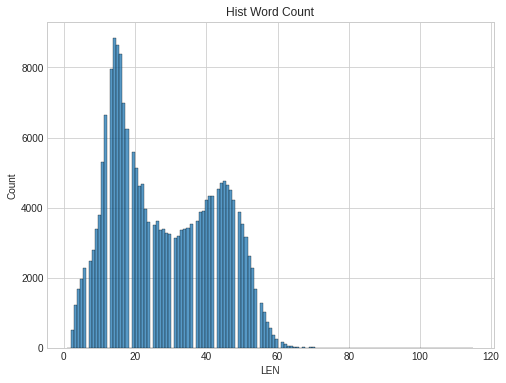

In [29]:
tmp = pd.DataFrame(texts.apply(len).values, columns=["LEN"])
tmp.index.name = "ID"
tmp.reset_index(inplace=True)
sns.histplot(tmp, x="LEN")
plt.title("Hist Word Count")
plt.show()

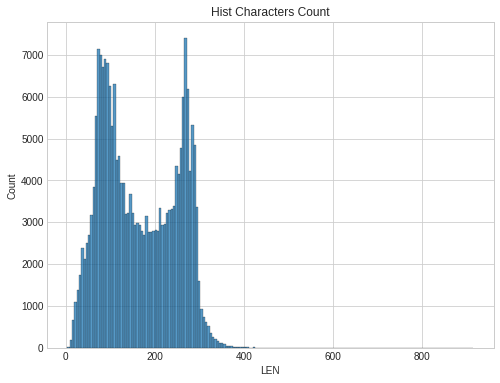

In [31]:
tmp = pd.DataFrame(texts.apply(lambda x: " ".join(x)).apply(len).values, columns=["LEN"])
tmp.index.name = "ID"
tmp.reset_index(inplace=True)
sns.histplot(tmp, x="LEN")
plt.title("Hist Characters Count")
plt.show()

In [34]:
tmp = pd.DataFrame(texts.apply(len).values, columns=["LEN"])
tmp["label"] = data.label.values

In [35]:
tmp.groupby("label").mean()

,LEN
label,
fake,22.438672
real,28.381312


In [36]:
tmp = pd.DataFrame(texts.apply(lambda x: " ".join(x)).apply(len).values, columns=["LEN"])
tmp["label"] = data.label.values
tmp.groupby("label").mean()

,LEN
label,
fake,137.606433
real,168.637462


In [37]:
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from collections import Counter

stop=set(stopwords.words('english'))

In [38]:
tmp = pd.DataFrame(texts.values, columns=["text"])
tmp["label"] = data.label.values

real_text = tmp[tmp.label=="real"]['text'].tolist()
fake_text = tmp[tmp.label=="fake"]['text'].tolist()

real_text = [word for line in real_text for word in line]
fake_text = [word for line in fake_text for word in line]

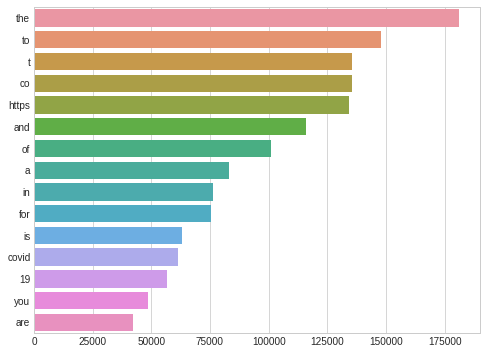

In [39]:
counter = Counter(real_text)

most = counter.most_common()

x, y = [], []

for word,count in most[:15]:
    x.append(word)
    y.append(count)

sns.barplot(x=y,y=x)
plt.show()

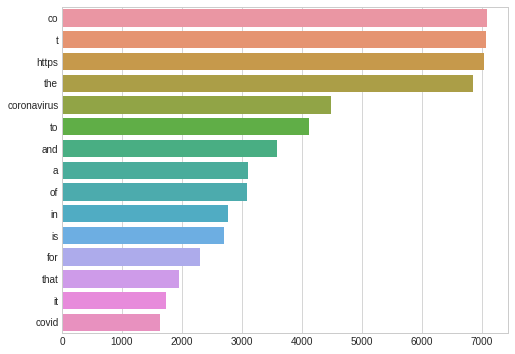

In [40]:
counter = Counter(fake_text)

most = counter.most_common()

x, y = [], []

for word,count in most[:15]:
    x.append(word)
    y.append(count)

sns.barplot(x=y,y=x)
plt.show()

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n), stop_words="english") # .fit(corpus)
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

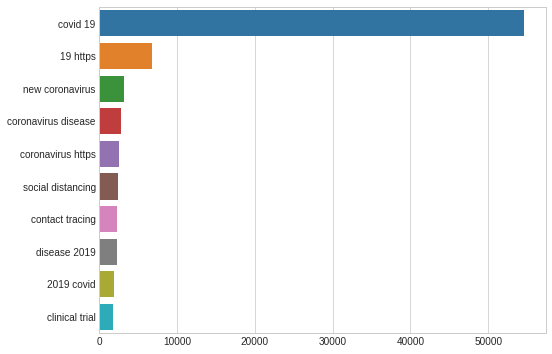

In [47]:
real_text = data[data.label=="real"]['text']
top_n_bigrams=get_top_ngram(real_text, 2)[:15]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.show()

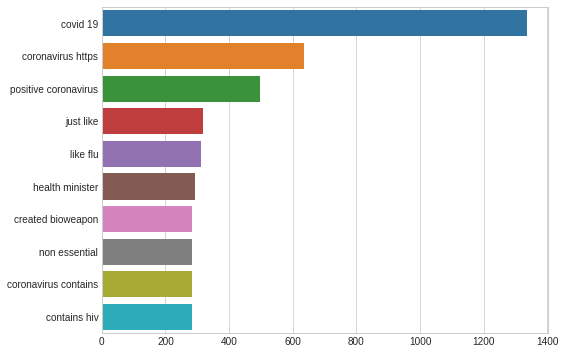

In [48]:
real_text = data[data.label=="fake"]['text']
top_n_bigrams=get_top_ngram(real_text, 2)[:15]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.show()

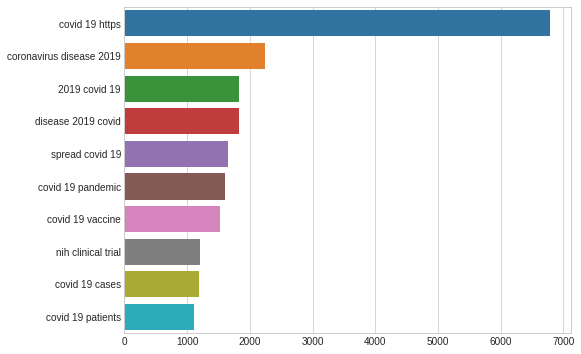

In [49]:
real_text = data[data.label=="real"]['text']
top_n_bigrams=get_top_ngram(real_text, 3)[:15]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.show()

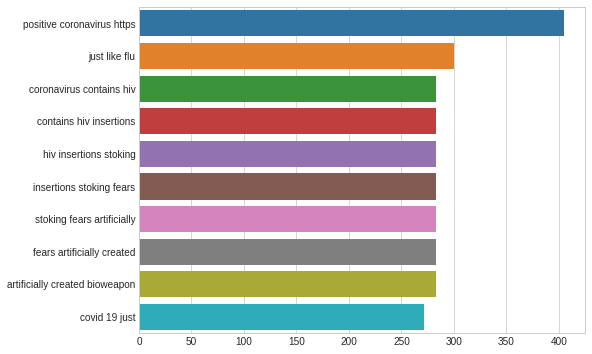

In [50]:
real_text = data[data.label=="fake"]['text']
top_n_bigrams=get_top_ngram(real_text, 3)[:15]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.show()